# <span style="color:darkblue"> QTM 151 - Quiz 5 </span>

## Try to submit as an HTML file

<font size="5"> 

Print your name below

In [1]:
# Write your answer here
print("Carissa Wu")



Carissa Wu


<font size = "5" >
This quiz is open book 

- You can use the lecture notes
- You will get partial credit for attempting the questions
- To get full credit, the code should run as intended
- You should <span style="color:red"> NOT </span> communicate with other students

Print the following message: <br>

"I will abide by Emory's code of conduct"


In [2]:
# Write your answer here:
print("I will abide by Emory's code of conduct")



I will abide by Emory's code of conduct


<font size = "5">

Import the libraries "matplotlib.pyplot" and "pandas"

In [3]:
# Write your answer here
import pandas as pd
import matplotlib.pyplot as plt




<font size = "5">

In this quiz you will work with data on exchange rates, <br>
for the following currencies:

- 1 euro (EUR) to dollar (USD)
- 1 pound (GPB) to dollar (USD).


<font size = "5">

(a) Import and parse dates

<font size = "3">

- Import the dataset "currencies.csv"
- Parse the "date_string" column with ```pd.to_datetime()```
- To get full points, set the "format" option using wildcards as in Lecture 21.


In [96]:
# Write your own code
currencies = pd.read_csv("data_raw/currencies.csv")
currencies["date"] = pd.to_datetime(currencies["date_string"])
date1 = pd.to_datetime(currencies["date"], format = "%A, %B %d, %Y")
currencies

,date_string,eur_to_usd,gbp_to_usd,date
0,"Monday, Jan 04, 1999",1.6581,1.1812,1999-01-04
1,"Tuesday, Jan 05, 1999",1.6566,1.1760,1999-01-05
2,"Wednesday, Jan 06, 1999",1.6547,1.1636,1999-01-06
3,"Thursday, Jan 07, 1999",1.6495,1.1672,1999-01-07
4,"Friday, Jan 08, 1999",1.6405,1.1554,1999-01-08
...,...,...,...,...
6320,"Monday, Mar 27, 2023",1.2278,1.0789,2023-03-27
6321,"Tuesday, Mar 28, 2023",1.2341,1.0844,2023-03-28
6322,"Wednesday, Mar 29, 2023",1.2313,1.0826,2023-03-29
6323,"Thursday, Mar 30, 2023",1.2368,1.0899,2023-03-30


<font size = "5">

(b) Plot multiple time series

<font size = "3">

- Create a line plot plot which has the "gbp_to_usd" and "eur_to_usd" on the y-axis <br>
and the date on the x-axis
- Label the x-axis, the y-axis, and the title
- Add a legend and set the names to "1 Euro to USD" and "1 GPB to USD"

Hint: See Lecture 22 for how to plot multiple columns <br>
Hint: Remember to include the legend names as a list ```[...]```


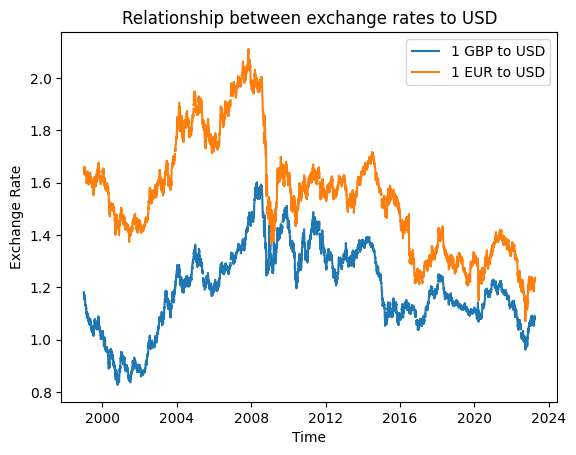

In [19]:
# Write your own code
plt.plot("date", "gbp_to_usd", data = currencies)
plt.plot("date", "eur_to_usd", data = currencies)
plt.xlabel("Time")
plt.ylabel("Exchange Rate")
plt.title("Relationship between exchange rates to USD")
plt.legend(["1 GBP to USD", "1 EUR to USD"])


<font size = "5">

(c) Compute growth rates

<font size = "3">

- Calculate a new column "growth_euro" which computes the percentage daily <br>
growth rate of "eur_to_usd".

Hint: Use ```.diff()``` and ```.shift(1)``` as in Lecture 22

In [82]:
# Write your own code
currencies["diff_eur_to_usd"] = currencies["eur_to_usd"].diff()

currencies["lag_eur_to_usd"]    = currencies["eur_to_usd"].shift(1)
currencies["growth_eur_to_usd"] = currencies["diff_eur_to_usd"]* 100/currencies["lag_eur_to_usd"]
currencies["diff_date"]  = currencies["date"]-currencies["date"].shift(1)


currencies["count_days"] = currencies["diff_date"].dt.days

display(currencies[["eur_to_usd", "diff_eur_to_usd", "lag_eur_to_usd", "growth_eur_to_usd"]])


,eur_to_usd,diff_eur_to_usd,lag_eur_to_usd,growth_eur_to_usd
0,1.6581,NaN,NaN,NaN
1,1.6566,-0.0015,1.6581,-0.090465
2,1.6547,-0.0019,1.6566,-0.114693
3,1.6495,-0.0052,1.6547,-0.314256
4,1.6405,-0.0090,1.6495,-0.545620
...,...,...,...,...
6320,1.2278,0.0053,1.2225,0.433538
6321,1.2341,0.0063,1.2278,0.513113
6322,1.2313,-0.0028,1.2341,-0.226886
6323,1.2368,0.0055,1.2313,0.446682


<font size = "5">

(d) Flag subset of data and plot

<font size = "3">

- Create a boolean colum (True/False) "bool_cond" which checks whether <br>
"growth_euro" had a value greater than 2 or less than -2
- Generate a line plot with the "growth_euro" series, label the axes and the title
- Use the command ```plt.fill_between()``` as in Lecture 22 to create a shaded region <br>
for time periods where "bool_cond" is true.



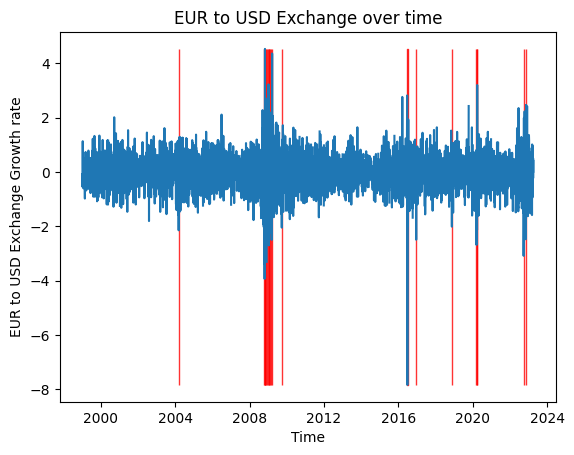

In [87]:
# Write your own code
currencies["bool_flagged"] = currencies["growth_eur_to_usd"] > 2
currencies["bool_flagged"] = currencies["growth_eur_to_usd"] < -2
plt.plot("date", "growth_eur_to_usd", data = currencies)
plt.xlabel("Time")
plt.ylabel("EUR to USD Exchange Growth rate")
plt.title("EUR to USD Exchange over time")

vec_y = currencies["growth_eur_to_usd"]
plt.fill_between(x= currencies["date"],
                 y1 = vec_y.min(),
                 y2 = vec_y.max(),
                 where = currencies["bool_flagged"],
                 alpha = 0.8,color = "red")

plt.show()


<font size = "5">

(e) Aggregate dataset by time period

<font size = "3">

- Create an object "month_config" that uses ```pd.Grouper()```, setting the key to <br>
the column "date" and freq to "m" (month)
- Follow the instructions in Lecture 21 to compute an aggregate dataset <br>
by month which computes the standard deviation of "eur_to_usd"
- Display the dataset




In [61]:
# Write your own code

currencies["month"] = currencies["date"].dt.to_period(freq = "m")

month_config = pd.Grouper(key='date', freq= "m")
monthlydata = (currencies
              .groupby(month_config) 
              .agg( eur_st_dev = ("eur_to_usd","std")))
monthlydata

,eur_st_dev
date,
1999-01-31,0.007345
1999-02-28,0.013345
1999-03-31,0.010475
1999-04-30,0.006172
1999-05-31,0.013046
...,...
2022-11-30,0.027308
2022-12-31,0.011389
2023-01-31,0.015046


<font size = "5">

(f) Convert a dataset to long format

<font size = "3">

- Convert the currencies dataset to long format using the following inputs

```
var_name   = "type",
value_name = "exchange_rate",
id_vars    = "date",
value_vars = ["eur_to_usd","gbp_to_usd"]
```

- Display the dataset

Hint: See Lecture 22 for details on ```pd.melt()```

In [52]:
# Write your own code
currencies_long = pd.melt(currencies,
                         var_name   = "type",
                         value_name = "exchange_rate",
                         id_vars='date',
                         value_vars=['eur_to_usd','gbp_to_usd'])

currencies_long


,date,type,exchange_rate
0,1999-01-04,eur_to_usd,1.6581
1,1999-01-05,eur_to_usd,1.6566
2,1999-01-06,eur_to_usd,1.6547
3,1999-01-07,eur_to_usd,1.6495
4,1999-01-08,eur_to_usd,1.6405
...,...,...,...
12645,2023-03-27,gbp_to_usd,1.0789
12646,2023-03-28,gbp_to_usd,1.0844
12647,2023-03-29,gbp_to_usd,1.0826
12648,2023-03-30,gbp_to_usd,1.0899
